In [2]:
import requests
import json
import pandas as pd

api_key = '1ZxcVL8gBZIFARcf1f9lOR4SZsK1lTSF'

ticker = 'ASME.AS'
data_type = 'historical-price-full'

url = f"https://financialmodelingprep.com/api/v3/{data_type}/{ticker}?apikey={api_key}"

r = requests.get(url)
data = r.json()

In [13]:
list(data.keys()) != ['symbol','historical']
url

'https://financialmodelingprep.com/api/v3/historical-price-full/ASME.AS?apikey=1ZxcVL8gBZIFARcf1f9lOR4SZsK1lTSF'

In [8]:
data.keys()

dict_keys(['Error Message'])

In [9]:
def request_is_good(json_r):
    b_return = False
    req_keys = list(json_r.keys())
    if req_keys == ['symbol','historical']:
        b_return = True

    return b_return

In [10]:
request_is_good(data)

False

In [2]:
import os
pp='c:\\Users\\top kek\\Desktop\\Python\\2_External APIs\\market data\\'
os.listdir(pp)

['ADBE.csv',
 'ADSK.csv',
 'AMCR.csv',
 'AMD.csv',
 'AME.csv',
 'ASML.AS.csv',
 'BALL.csv',
 'DUOL.csv',
 'ENX.PA.csv',
 'INTC.csv',
 'IP.csv',
 'KO.csv',
 'LHA.DE.csv',
 'LOGI.csv',
 'MA.csv',
 'MDLZ.csv',
 'PFE.DE.csv',
 'PHIA.AS.csv',
 'PLTR.csv',
 'PYPL.csv',
 'RI.PA.csv',
 'SEE.csv',
 'TEAM.csv',
 'THULE.ST.csv',
 'UNA.AS.csv',
 'WDI.csv']

In [8]:
path = 'c:\\Users\\top kek\\Desktop\\Python\\2_External APIs\\market data\\'
ticker = "ADBE"
df_temp = pd.read_csv(path + ticker + '.csv')
df_temp = df_temp.set_index('date')
df_temp = df_temp[['adjClose']]
df_temp.rename(columns={'adjClose': ticker}, inplace=True)
market_data = df_temp

print(market_data)

              ADBE
date              
2024-05-17  483.43
2024-05-16  482.88
2024-05-15  485.35
2024-05-14  475.95
2024-05-13  483.11
2024-05-10  482.29
2024-05-09  482.65
2024-05-08  488.10
2024-05-07  492.27
2024-05-06  493.59
2024-05-03  486.18
2024-05-02  476.57
2024-05-01  469.39
2024-04-30  462.83
2024-04-29  473.07
2024-04-26  477.56
2024-04-25  473.44
2024-04-24  477.12
2024-04-23  472.90
2024-04-22  466.89
2024-04-19  465.02
2024-04-18  473.18
2024-04-17  474.45
2024-04-16  476.22
2024-04-15  470.10
2024-04-12  474.09
2024-04-11  484.28
2024-04-10  487.22
2024-04-09  492.55
2024-04-08  484.28
...            ...
2024-02-13  601.89
2024-02-12  611.84
2024-02-09  627.21
2024-02-08  615.86
2024-02-07  615.85
2024-02-06  607.14
2024-02-05  630.50
2024-02-02  634.76
2024-02-01  627.91
2024-01-31  617.78
2024-01-30  627.96
2024-01-29  630.23
2024-01-26  613.93
2024-01-25  622.58
2024-01-24  606.48
2024-01-23  597.18
2024-01-22  603.59
2024-01-19  611.55
2024-01-18  593.70
2024-01-17  

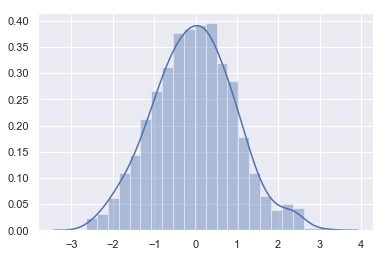

In [11]:
import scipy.stats as stats
import seaborn as sns
rvs = stats.norm(loc=0, scale=1)
normal_sample = rvs.rvs(size=1000)
sns.set()
sns.distplot(normal_sample)

((array([-2.44365145, -2.10506693, -1.90903531, -1.76699186, -1.65363525,
         -1.55825125, -1.47524847, -1.40132198, -1.3343479 , -1.27287636,
         -1.21587124, -1.16256502, -1.11237236, -1.06483603, -1.01959159,
         -0.97634354, -0.93484865, -0.89490409, -0.85633879, -0.81900692,
         -0.78278305, -0.74755838, -0.71323778, -0.6797375 , -0.64698332,
         -0.61490903, -0.58345528, -0.55256852, -0.52220018, -0.49230603,
         -0.46284556, -0.43378149, -0.40507936, -0.37670717, -0.34863508,
         -0.32083512, -0.29328097, -0.26594775, -0.23881182, -0.21185064,
         -0.18504261, -0.15836693, -0.13180349, -0.10533274, -0.07893561,
         -0.05259338, -0.0262876 ,  0.        ,  0.0262876 ,  0.05259338,
          0.07893561,  0.10533274,  0.13180349,  0.15836693,  0.18504261,
          0.21185064,  0.23881182,  0.26594775,  0.29328097,  0.32083512,
          0.34863508,  0.37670717,  0.40507936,  0.43378149,  0.46284556,
          0.49230603,  0.52220018,  0.

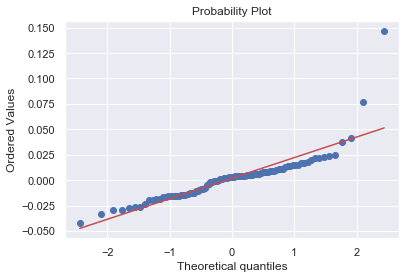

In [30]:
import numpy as np
import matplotlib.pyplot as plt

df_logreturns = market_data.apply(np.log)-market_data.shift(1).apply(np.log)
df_logreturns.dropna(inplace=True)
real_sample = np.array(df_logreturns['ADBE'])

stats.probplot(real_sample, dist="norm", plot=plt)

c:\Users\top kek\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
c:\Users\top kek\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
c:\Users\top kek\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide


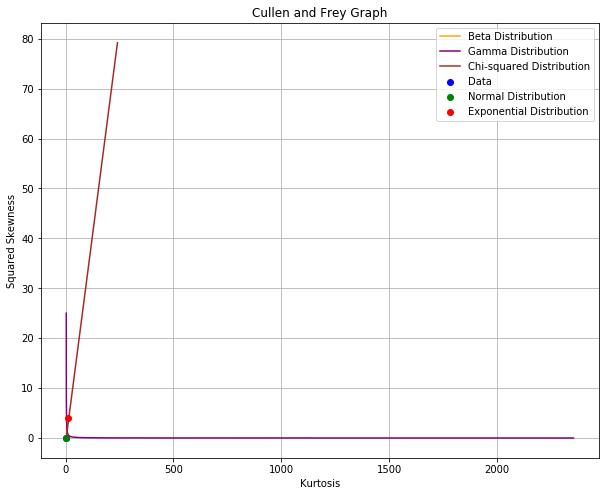

<Figure size 432x288 with 0 Axes>

In [2]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns

# Step 2: Generate or load your data
# For example, let's generate a sample dataset
data = np.random.normal(0, 1, 1000)

# Step 3: Calculate skewness and kurtosis
data_skewness = skew(data)
data_kurtosis = kurtosis(data, fisher=False)  # Use Pearson's definition of kurtosis

# Step 4: Plot the Cullen and Frey graph
plt.figure(figsize=(10, 8))

# Plot the point for the data
plt.scatter(data_kurtosis, data_skewness**2, color='blue', label='Data', zorder=5)

# Label axes
plt.xlabel('Kurtosis')
plt.ylabel('Squared Skewness')
plt.title('Cullen and Frey Graph')

# Plot theoretical distributions
# Normal distribution
plt.scatter(3, 0, color='green', label='Normal Distribution', zorder=5)

# Exponential distribution
exp_kurtosis = 9
exp_skewness = 2**2
plt.scatter(exp_kurtosis, exp_skewness, color='red', label='Exponential Distribution', zorder=5)

# Beta distribution (skewed)
beta_skewness = np.linspace(0, 4, 100)
beta_kurtosis = 3 + beta_skewness
plt.plot(beta_kurtosis, beta_skewness, label='Beta Distribution', color='orange')

# Gamma distribution
gamma_skewness = np.linspace(0, 5, 100)
gamma_kurtosis = 3 + 6 / (gamma_skewness**2)
plt.plot(gamma_kurtosis, gamma_skewness**2, label='Gamma Distribution', color='purple')

# Chi-squared distribution
chi2_kurtosis = 3 + 12 / (gamma_skewness)
chi2_skewness = 2 / np.sqrt(gamma_skewness)
plt.plot(chi2_kurtosis, chi2_skewness**2, label='Chi-squared Distribution', color='brown')

# Add legend
plt.legend()
plt.grid(True)

# Show plot
plt.show()
plt.savefig('Cullen Frey Graph.png')

C:\Users\top kek\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\top kek\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


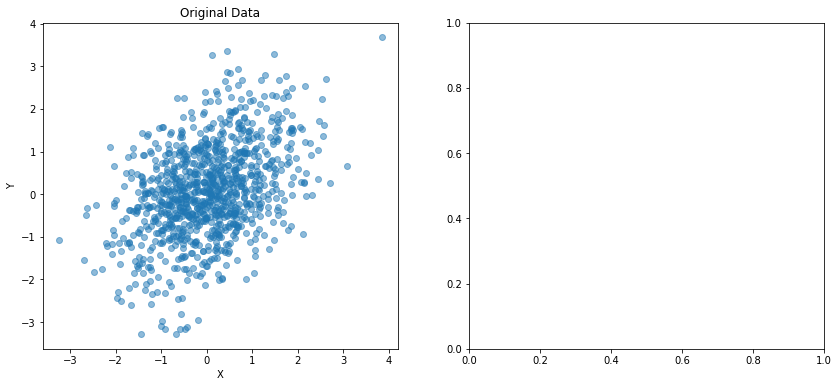

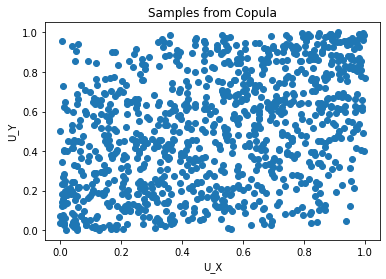

In [2]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kendalltau, spearmanr, rankdata
from statsmodels.distributions.empirical_distribution import ECDF
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import scatter_2d

# Step 2: Generate or load data
# For example, let's create synthetic data with a known dependence structure
np.random.seed(42)
n_samples = 1000

# Generate data from two correlated normal distributions
data_x = np.random.normal(0, 1, n_samples)
data_y = 0.5 * data_x + np.random.normal(0, 1, n_samples)

data = pd.DataFrame({'X': data_x, 'Y': data_y})

# Step 3: Transform marginals to uniform using empirical CDF
ecdf_x = ECDF(data['X'])
ecdf_y = ECDF(data['Y'])

u_x = ecdf_x(data['X'])
u_y = ecdf_y(data['Y'])

u_data = pd.DataFrame({'U_X': u_x, 'U_Y': u_y})

# Step 4: Fit a Gaussian copula to the transformed data
copula = GaussianMultivariate()
copula.fit(u_data)

# Step 5: Generate samples from the fitted copula
copula_samples = copula.sample(n_samples)

# Step 6: Visualize the results
plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(data['X'], data['Y'], alpha=0.5)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')

# Samples from copula
plt.subplot(1, 2, 2)
scatter_2d(copula_samples, title='Samples from Copula')

plt.show()


C:\Users\top kek\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


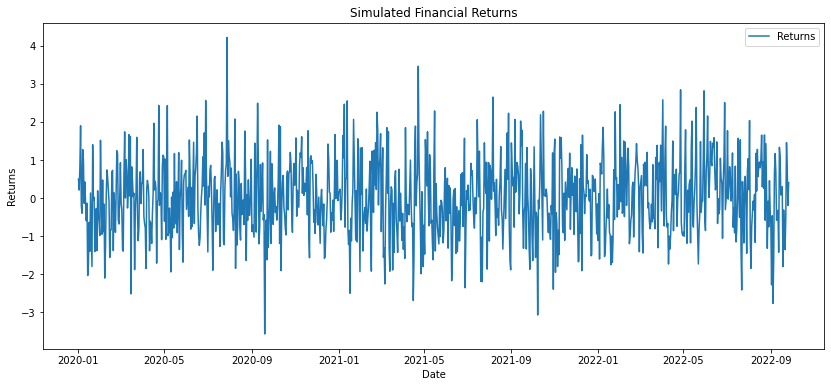

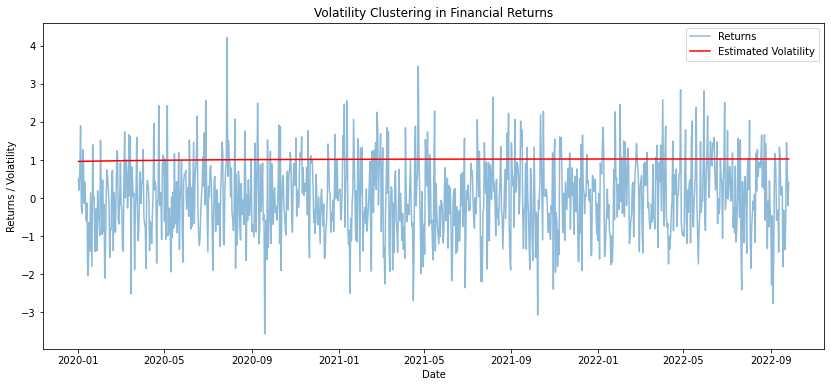

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Step 2: Load and prepare financial data
# For example, let's use some synthetic data
np.random.seed(42)
n_days = 1000
returns = np.random.normal(0, 1, n_days)
volatility = np.zeros(n_days)

# Simulate some volatility clustering
for i in range(1, n_days):
    returns[i] += 0.9 * returns[i-1] * np.exp(-returns[i-1]**2)

# Convert to a DataFrame
dates = pd.date_range(start='2020-01-01', periods=n_days)
data = pd.DataFrame({'Returns': returns}, index=dates)

# Step 3: Plot the time series and returns
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Returns'], label='Returns')
plt.title('Simulated Financial Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Step 4: Estimate volatility using GARCH model
# Fit a GARCH(1, 1) model
garch_model = arch_model(data['Returns'], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Step 5: Visualize the volatility clustering
data['Volatility'] = garch_fit.conditional_volatility

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Returns'], label='Returns', alpha=0.5)
plt.plot(data.index, data['Volatility'], label='Estimated Volatility', color='red')
plt.title('Volatility Clustering in Financial Returns')
plt.xlabel('Date')
plt.ylabel('Returns / Volatility')
plt.legend()
plt.show()

Mean return is ADSK   -0.000597
dtype: float64. Vola is ADSK    0.016388
dtype: float64. Highest return is 0.030462524503835908. Lowest - -0.06013184104462432.


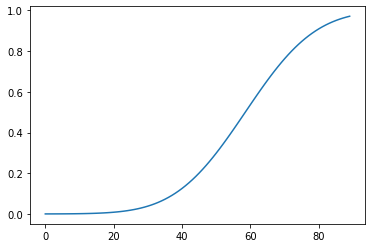

In [35]:
from ReturnProfile import asset_performance
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

eq = asset_performance("ADSK")

min_x = min(eq.real_sample)
max_x = max(eq.real_sample)
x_theo = np.linspace(min_x,max_x,90)

plt.plot(stats.norm.cdf(x_theo, eq.mean_log_return, eq.vola))




In [2]:
import pandas as pd
from ReturnProfile import asset_performance
eq = asset_performance("ADSK")

{'mean': ADSK   -0.000597
dtype: float64, 'vola': ADSK    0.010062
dtype: float64, 'skew': ADSK   -0.906084
dtype: float64, 'kurt': ADSK    1.993166
dtype: float64, 'std': ADSK    0.016388
dtype: float64, 'observation period (days)': 95}


In [33]:
df_vwap = pd.merge(eq.df_prices,eq.df_volumes,left_index=True, right_index=True, how='left')
df_vwap.columns = ['p','q']
n = eq.dict_quick_stats['observation period (days)']
vwap_range = 30
df_vwap['vwap'] = None
# li_vwap = []

for i in range(1,n-vwap_range):
            
    df_temp = df_vwap.iloc[i:i+vwap_range]
    df_temp['weights'] = df_temp.q / df_temp.q.sum()
    vwap = (df_temp.p * df_temp.weights).sum()
    df_vwap['vwap'].iloc[i-1] = vwap

    # li_vwap.append(vwap)

df_vwap

c:\Users\top kek\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\top kek\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,p,q,vwap
date,,,
2024-05-17,221.21,1541746,219.783492
2024-05-16,220.43,1405406,220.423093
2024-05-15,220.24,1251171,221.05411
2024-05-14,215.83,1883340,222.0891
2024-05-13,216.65,1465619,222.783653
...,...,...,...
2024-01-08,235.45,1447519,None
2024-01-05,229.52,1138296,None
2024-01-04,228.92,1552829,None


In [30]:
li_vwap

[219.78349179275267,
 220.423093339891,
 221.05410962868658,
 222.08910031715791,
 222.78365283438077,
 223.50531071986143,
 224.33705881295728,
 225.22947004040458,
 226.3531114313442,
 227.23069677130727,
 228.7498346078378,
 230.13792404772454,
 231.21332791477445,
 232.15804515102764,
 233.85119399202114,
 234.8201147376491,
 236.14501280012513,
 238.0223750751262,
 239.22249566531627,
 240.24933266182424,
 242.23168377138262,
 245.76969454315116,
 250.84620600533034,
 252.56601618061617,
 254.46371839696093,
 255.4040901371328,
 255.78232776966834,
 256.3046115033046,
 256.49002412846136,
 256.81685285809743,
 257.19592737851974,
 257.536141699755,
 257.818521848397,
 258.2032896758886,
 258.232746326244,
 258.2731014054758,
 258.1612661167261,
 258.18013917114183,
 258.45706139400653,
 258.42022111167455,
 258.1267572418979,
 257.9115382833801,
 257.7854301199511,
 257.79087661624993,
 257.97006042886494,
 257.75398463172263,
 257.6917509321909,
 257.50543192163366,
 257.37686909